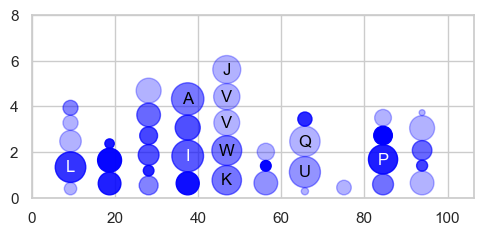

In [368]:
import numpy as np
from matplotlib import pyplot as plt, patches
import seaborn as sns
import string
sns.set()
sns.set_style("whitegrid")

#three variables - histogram (X), circle size (Y), and circle alpha (Z)
n = 40
X = np.random.rand(n) * 100
Y = np.random.rand(n) * 50
Z = np.random.rand(n)
Z = np.where(Z<.3,.3,Z) #just a patch to make sure all the circles are visible
LABELS = np.random.choice(list(string.ascii_uppercase),n)

#Sort all values based on the order of X, helps with the looping
x_value_order = np.argsort(X,axis=0)
X = X[x_value_order]
Y= Y[x_value_order]
Z = Z[x_value_order]
LABELS = LABELS[x_value_order]


#parameters to use below
number_of_bins = 10
range_of_bins = (0,np.max(X)+10)
size_adjust = 1.0
#epsilon = .001

#Get the bins
bin_counts, bin_edges = np.histogram(X, bins=number_of_bins)


#Find the bin for each value of X
x_bin_index = np.searchsorted(bins_edges[1:-1],X,side='right') #np.digitize(X, bins_edges) - 1

#Find the midpoint of the bin to place the circle
midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2

#make sure the circle isn't bigger than the width of the bin
max_size = (bins_edges[1] - bins_edges[0])/2.0 - size_adjust

#calculate the radius of each circle proportional to the value
radii = max_size * (np.sqrt(Y)/np.max(np.sqrt(Y)))

#Order to place the circles down based on the bin order
#might be a way to sort these within the bin so you can get the bubbles to order based on their size
value_order =  np.argsort(x_bin_index,axis=0)
#create the plot
fig,ax= plt.subplots(figsize=(5,5))
# makes sure that the circles are stretched
ax.set_aspect('equal',adjustable='box')

#preset the variables
current_bin = 0
current_y = np.min(radii)
current_x = np.min(midpoints)
prev_y = 0
max_y = 0
xticks = list(range(0,np.max(bin_counts)+1))



#loop to place the circles down on the plot
#I'm using circles because the radius is in the data space. This gives a bit more control
#Alternatively use a scatter plot with the marker size value set. Scale the radius to points.
#fig.canvas.draw()
#s = ((ax.get_window_extent().width  / (vmax-vmin+1.) * 72./fig.dpi) ** 2)
#https://stackoverflow.com/questions/48172928/scale-matplotlib-pyplot-axes-scatter-markersize-by-x-scale
#This might work better if you want to create a legend, otherwise I think you need to use patches to place 
#the legend somewhere on the plot area
for i_x in value_order:
    #move the x value when the bin changes
    if current_bin != x_bin_index[i_x]:
        max_y=max(max_y,current_y)
        current_bin = x_bin_index[i_x]
        current_y = np.min(radii)
        current_x = midpoints[current_bin]
        prev_y = 0
    current_bubble = patches.Circle((current_x,current_y+radii[i_x]), radius=radii[i_x], color='blue', alpha=Z[i_x])
    ax.add_patch(current_bubble)
    if Y[i_x] > 30:
        color = 'black'
        if Z[i_x] > .60:
            color = 'white'
        ax.text(current_x,current_y+radii[i_x],LABELS[i_x],ha = 'center',va = 'center', color = color)
    prev_y = current_y+radii[i_x]
    current_y = radii[i_x] + prev_y
    
    

#expand the limits so you can see everything
ax.set_xlim([0,np.max(bin_edges)+np.max(radii)*2])
ax.set_ylim([0,max_y+np.max(radii)*2])



#this is a little messy, but changes the radius limits to the counts of the bins
interval_labels = int(np.max(bin_counts)/3)
new_axis_labels = [str(int(a)) for a in np.arange(0,np.max(bin_counts)+interval_labels+1,interval_labels)]
interval_ticks = np.ceil(ax.get_ylim()[1]/(len(new_axis_labels)-1))
new_axis_ticks = [0] + [a for a in np.arange(interval_ticks,ax.get_ylim()[1]+interval_ticks,interval_ticks)]   
ax.set_yticks(new_axis_ticks,labels=new_axis_labels)



plt.tight_layout();

In [6]:
import numpy as np
from matplotlib import patches

def bubble_histogram(ax, numberOfBins:int, X:np.array,Y:np.array,Z:np.array=None,LABELS:np.array=None,addLegend=True,reduceCircleSize=1.0):

    #Sort all values based on the order of X, helps with the looping
    x_value_order = np.argsort(X,axis=0)
    X = X[x_value_order]
    Y= Y[x_value_order]
    if Z is not None:
        Z = Z[x_value_order]
    else:
        Z = np.ones(X.shape)
    if LABELS is not None:
        LABELS = LABELS[x_value_order]

    #Get the bins
    bin_counts, bin_edges = np.histogram(X, bins=numberOfBins)

    #Find the bin for each value of X
    x_bin_index = np.searchsorted(bin_edges[1:-1],X,side='right')

    #Find the midpoint of the bin to place the circle
    midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2

    #make sure the circle isn't bigger than the width of the bin
    max_size = (bin_edges[1] - bin_edges[0])/2.0 - reduceCircleSize

    #calculate the radius of each circle proportional to the value
    radii = max_size * (np.sqrt(Y)/np.max(np.sqrt(Y)))

    #Order to place the circles down based on the bin order
    #might be a way to sort these within the bin so you can get the bubbles to order based on their size
    value_order =  np.argsort(x_bin_index,axis=0)
    #create the plot
    
    # makes sure that the circles are stretched
    ax.set_aspect('equal',adjustable='box')

    #preset the variables
    current_bin = 0
    current_y = np.min(radii)
    current_x = np.min(midpoints)
    prev_y = 0
    max_y = 0
    xticks = list(range(0,np.max(bin_counts)+1))



    #loop to place the circles down on the plot
    #I'm using circles because the radius is in the data space. This gives a bit more control
    #Alternatively use a scatter plot with the marker size value set. Scale the radius to points.
    #fig.canvas.draw()
    #s = ((ax.get_window_extent().width  / (vmax-vmin+1.) * 72./fig.dpi) ** 2)
    #https://stackoverflow.com/questions/48172928/scale-matplotlib-pyplot-axes-scatter-markersize-by-x-scale
    #This might work better if you want to create a legend, otherwise I think you need to use patches to place 
    #the legend somewhere on the plot area
    for i_x in value_order:
        #move the x value when the bin changes
        if current_bin != x_bin_index[i_x]:
            max_y=max(max_y,current_y)
            current_bin = x_bin_index[i_x]
            current_y = np.min(radii)
            current_x = midpoints[current_bin]
            prev_y = 0
        current_bubble = patches.Circle((current_x,current_y+radii[i_x]), radius=radii[i_x], color='blue', alpha=Z[i_x])
        ax.add_patch(current_bubble)
        #if Y[i_x] > 30:
        #    color = 'black'
        #    if Z[i_x] > .60:
        #        color = 'white'
        if LABELS is not None:
            color = 'black'
            ax.text(current_x,current_y+radii[i_x],LABELS[i_x],ha = 'center',va = 'center', color = color)
        prev_y = current_y+radii[i_x]
        current_y = radii[i_x] + prev_y

    if addLegend == True:
        #expand the limits so you can see everything
        
        ax.set_xlim([0,np.max(bin_edges)+np.max(radii)*2])
        ax.set_ylim([0,max_y+np.max(radii)*2])
    else:
        #expand the limits so you can see everything
        ax.set_xlim([0,np.max(bin_edges)+np.max(radii)*2])
        ax.set_ylim([0,max_y+np.max(radii)*2])



    #this is a little messy, but changes the radius limits to the counts of the bins
    interval_labels = int(np.max(bin_counts)/3)
    new_axis_labels = [str(int(a)) for a in np.arange(0,np.max(bin_counts)+interval_labels+1,interval_labels)]
    interval_ticks = np.ceil(ax.get_ylim()[1]/(len(new_axis_labels)-1))
    new_axis_ticks = [0] + [a for a in np.arange(interval_ticks,ax.get_ylim()[1]+interval_ticks,interval_ticks)]   
    ax.set_yticks(new_axis_ticks,labels=new_axis_labels)



    plt.tight_layout();

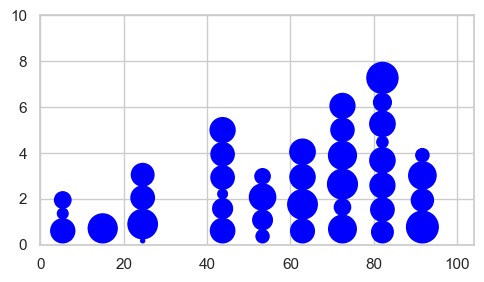

In [9]:
from matplotlib import pyplot as plt, patches
import seaborn as sns
import string
sns.set()
sns.set_style("whitegrid")

fig,ax= plt.subplots(figsize=(5,5))
#three variables - histogram (X), circle size (Y), and circle alpha (Z)
n = 40
X = np.random.rand(n) * 100
Y = np.random.rand(n) * 50
Z = np.random.rand(n)
Z = np.where(Z<.3,.3,Z) #just a patch to make sure all the circles are visible
LABELS = np.random.choice(list(string.ascii_uppercase),n)


bubble_histogram(ax, 10, X, Y, None, None)